# Machine Learning Engineer Nanodegree
## Capstone Proposal - Predicting Loan write-offs from LendingClub data set 
Antal Berenyi
March 25, 2018

## Proposal

I propose to develop a method to help identify loans that are likely to be charged off (default). 

### Domain Background
_(approx. 1-2 paragraphs)_

In this section, provide brief details on the background information of the domain from which the project is proposed. Historical information relevant to the project should be included. It should be clear how or why a problem in the domain can or should be solved. Related academic research should be appropriately cited in this section, including why that research is relevant. Additionally, a discussion of your personal motivation for investigating a particular problem in the domain is encouraged but not required.

LendingClub (LC) is a peer-to-peer lending company. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans.  The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015. [wikipedia](https://en.wikipedia.org/wiki/Lending_Club) Loans can be issued for a variety of reasons. Loans are issued as $25 notes so that lenders diversify their investment over many loans.

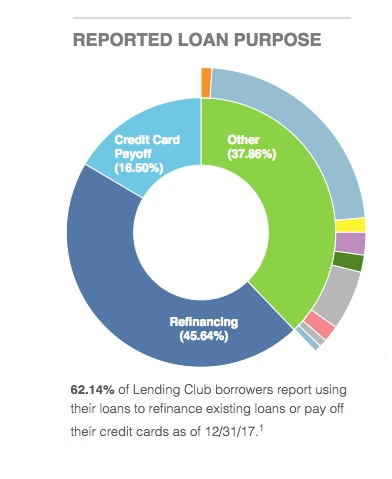


[source](https://www.lendingclub.com/info/statistics.action)

 LC divides loans into categores A,B,C,D,E,FG, based on variables that measure the quality of the loan. A is highest and FG is lowest. Category A loans offers the lowest rate of return backed by borrowes with highest credit rating that are most likely to repay the loan in theory. FG are the riskiest loans, high interest rate but least likely to repay the loan.

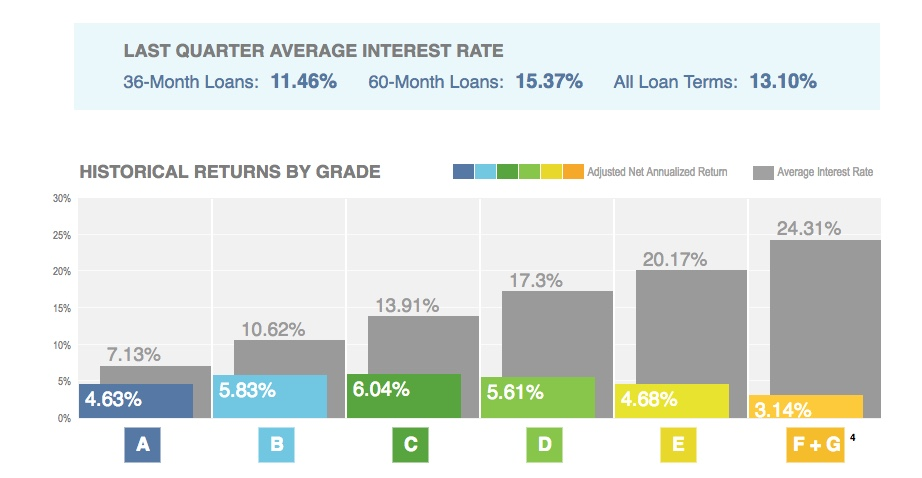

[source](https://www.lendingclub.com/info/demand-and-credit-profile.action)

If a borrower does not return the loan it first becomes late status then charged off after 3 months. If a loan is chared off the investor loses his or her investment. LC collects statistics on borrowers that they decide borrower rating and loan class on. This data is available to download on the LC web site [download-data](https://www.lendingclub.com/info/download-data.action)

I have been investing in LC for about 3 years. Over this time period I have invested in a range of loan classes. About 50\% of the interest earned was erased by load charge-offs. That means that my profit could be doubled if I could identify loans that are more likely to be charged off and not invest in notes from that loan. 

### Problem Statement
_(approx. 1 paragraph)_

In this section, clearly describe the problem that is to be solved. The problem described should be well defined and should have at least one relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms) , measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

The actual investor account returns are significantly lower than the load interest rates precisely because of the charge-off rate. 
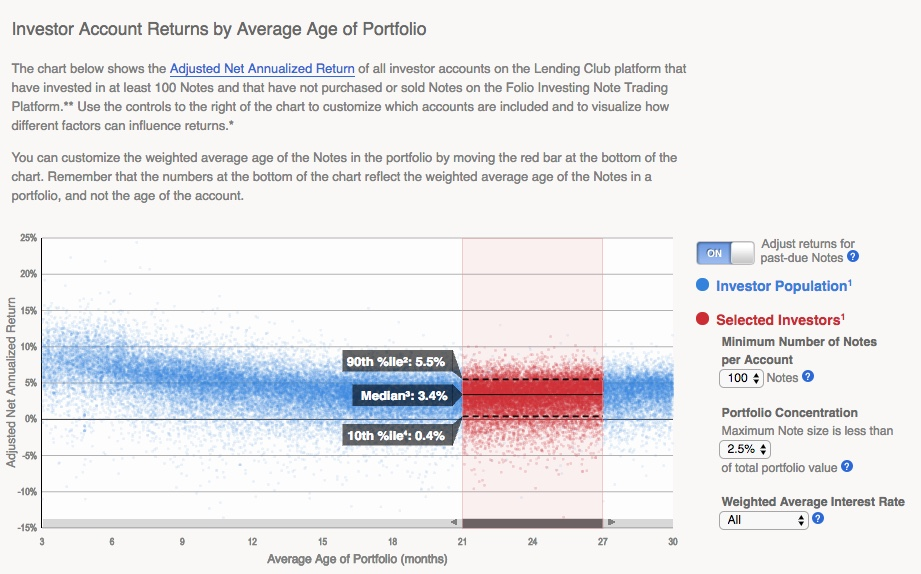

The charge-off rate can be calculated as the percentage of loans with status "charge-off" from the data set. The data set contains lots of features that can be indicative of the evetual charge-off of the loan. The potential solution to losing profits is to identify loans that are likely to default and not investing in them. The goal is to identify a correlation between loan features and "charge-off". A binary classifier could be a solution to filter out bad loans. After applying the filter the "charge-off" rate should drop below the traing data set charge-off rate. The accuracy of the filter should be better than identifying loans by picking randomly. Feature values indicating charge-off within each class A,B,C, etc could be different from each other so it is worth-while investigating each class.

### Datasets and Inputs
_(approx. 2-3 paragraphs)_

In this section, the dataset(s) and/or input(s) being considered for the project should be thoroughly described, such as how they relate to the problem and why they should be used. Information such as how the dataset or input is (was) obtained, and the characteristics of the dataset or input, should be included with relevant references and citations as necessary It should be clear how the dataset(s) or input(s) will be used in the project and whether their use is appropriate given the context of the problem.

The publicly available data used for the problem is downloaded from LC web site. [download-data](https://www.lendingclub.com/info/download-data.action) . It contains all the LendingClub loan information available for investors to make a decision about whenter to fund the loan or not. The [LCDataDictionary.xlsx](data/LCDataDictionary.xlsx) file lists the feature with explanation about each feature. The data is in zipped up .csv format that can be imported in Excel, Pandas or other tools. The zipped file size is about 22MB while unzipped it is 110 MB. Each row represents a loan. Each column is a feature. Column "loan_status" is the target variable to be predicted.


 

In [4]:
import pandas as pd
pd.options.display.max_rows = 10
pd.read_excel('data/LCDataDictionary.xlsx')

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
148,settlement_amount,The loan amount that the borrower has agreed t...
149,settlement_percentage,The settlement amount as a percentage of the p...
150,settlement_term,The number of months that the borrower will be...
151,NaN,NaN


### Solution Statement
_(approx. 1 paragraph)_

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Additionally, describe the solution thoroughly such that it is clear that the solution is quantifiable (the solution can be expressed in mathematical or logical terms) , measurable (the solution can be measured by some metric and clearly observed), and replicable (the solution can be reproduced and occurs more than once).

The solution involves training a classifier to predict if a loan is going to be charged off. The solution will involve the following: Define the percentage of charged off loans calculated from the data set as P0. A naive predictor is built to randomly label p0 percentage of the data points as "charge-off". Calculate the F2 score of the naive predictor. 



### Benchmark Model
_(approximately 1-2 paragraphs)_

In this section, provide the details for a benchmark model or result that relates to the domain, problem statement, and intended solution. Ideally, the benchmark model or result contextualizes existing methods or known information in the domain and problem given, which could then be objectively compared to the solution. Describe how the benchmark model or result is measurable (can be measured by some metric and clearly observed) with thorough detail.

### Evaluation Metrics
_(approx. 1-2 paragraphs)_

In this section, propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).


F2 score. We want to label all charged off loans to minimize our loss. It is OK to mislabel a few loans as false positive, so the situation is similar to a fraud detector or spam filter, where we are aiming for high Recall. F2 score scores high Recall rate favorably.

### Project Design
_(approx. 1 page)_

In this final section, summarize a theoretical workflow for approaching a solution given the problem. Provide thorough discussion for what strategies you may consider employing, what analysis of the data might be required before being used, or which algorithms will be considered for your implementation. The workflow and discussion that you provide should align with the qualities of the previous sections. Additionally, you are encouraged to include small visualizations, pseudocode, or diagrams to aid in describing the project design, but it is not required. The discussion should clearly outline your intended workflow of the capstone project.



The data investigated is for the time period `Q4 2007`. 

The data is contained in the zip file [LoanStats_2017Q4.csv.zip](https://resources.lendingclub.com/LoanStats_2017Q4.csv.zip) The zip file size is 20,272kb.

It is downloaded and unzipped to LoanStats_securev1_2017Q4.csv. The unzipped file is 109,3 MB.

The files contain complete loan data for all loans issued through the time period stated, including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. 


I intend to find the characteristics of the loan that will make it a likely candidate for defaulting. I intend to compare a DecisionTree, NaiveBayes, KNN and clustering models. 